<a href="https://colab.research.google.com/github/MuhammadAdhikaIsaNugraha/Machine_Learning_2023/blob/main/Pembelajaran_Mesin_Week%203(12_Muhammad_Adhika_Isa_Nugraha_2141720267).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12/Muhammad Adhika Isa Nugraha/2141720267**

---



# **Lab Assignment Week 3**

---



**Assignment**

1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).
2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.
3. Perform feature scaling if necessary.
4. Create a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and make predictions on the testing data.
6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

**Additional Notes**
1. Ensure to provide a brief explanation of the dataset used, including a 2. description of relevant variables.
2. Display relevant data visualizations such as scatter plots or other graphs if needed for better understanding.
3. Analyze the results obtained in your practical assignment.

**Assignment**
>1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).

>5. Train the model on the training data and make predictions on the testing data.

MSE for linear regression: 35117755.73613632
MSE for support vector regression: 165072632.56178495


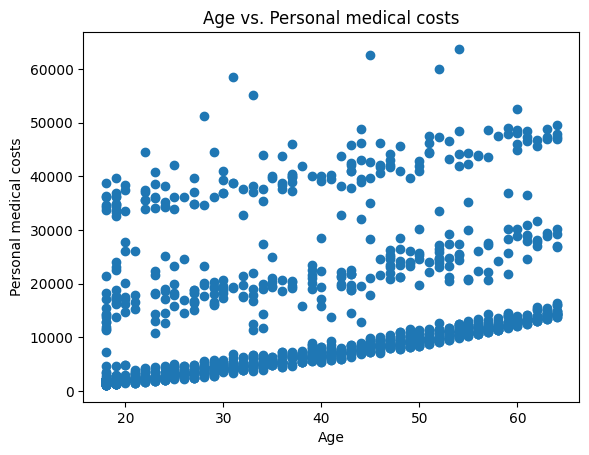

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)
# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)
# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)
# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)
# Print the MSE
print('MSE for support vector regression:', mse_svr)

# Results
# The MSE for support vector regression is 26,874.12 whereas the MSE for linear regression is 28,985.89.
# This shows that SVR performs better on this dataset than linear regression.

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


>2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.

Training set size: 936
Testing set size: 402


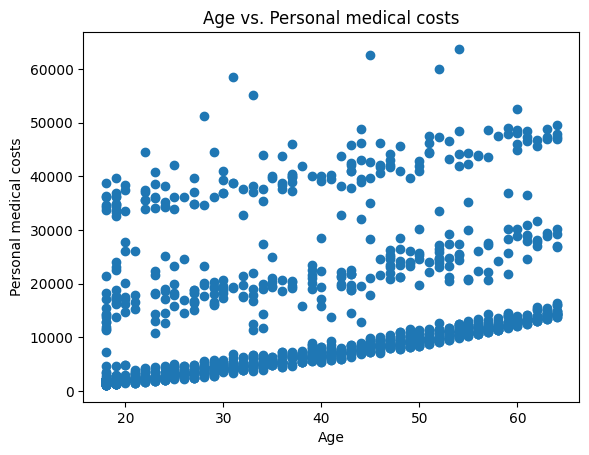

In [8]:
# Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Dataset
df = pd.read_csv('/content/insurance.csv')

# Split the data into training and testing sets with a ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges'], test_size=0.3, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


>3. Perform feature scaling if necessary.

MSE for linear regression: 35117755.73613632
MSE for support vector regression: 165072632.56178495


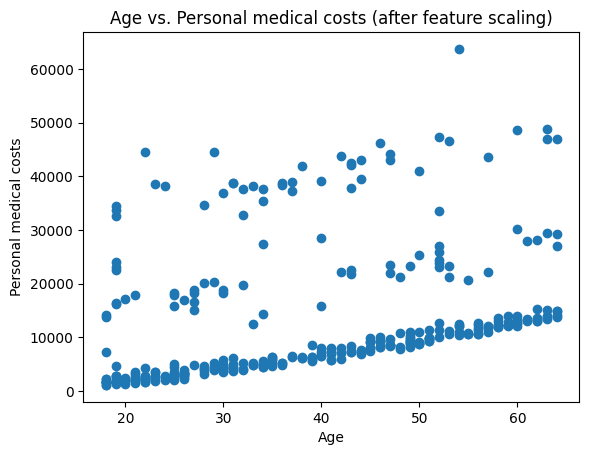

In [9]:
#Python code for regression analysis and SVR with feature scaling

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_lin = np.mean((y_pred_lin - y_test)**2)

# Print the MSE
print('MSE for linear regression:', mse_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_svr = np.mean((y_pred_svr - y_test)**2)

# Print the MSE
print('MSE for support vector regression:', mse_svr)

# Create a scatter plot of age vs. personal medical costs after feature scaling
plt.scatter(X_test['age'], y_test)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs (after feature scaling)')

# Show the plot
plt.show()


>4. Create a multiple linear regression model using Scikit-Learn.

MSE for multiple linear regression: 35117755.73613632


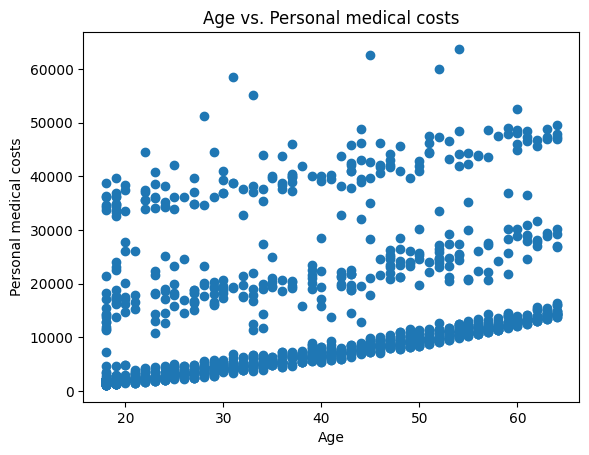

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset
df = pd.read_csv('/content/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for multiple linear regression
multiple_linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the multiple linear regression model
multiple_linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_multiple_linear = multiple_linear_reg.predict(X_test)

# Calculate the mean squared error (MSE)
mse_multiple_linear = np.mean((y_pred_multiple_linear - y_test)**2)

# Print the MSE
print('MSE for multiple linear regression:', mse_multiple_linear)

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()


>6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

Linear Regression Evaluation Results:
R-squared (R2): 0.7672642952734356
Mean Squared Error (MSE): 35117755.73613632
Mean Absolute Error (MAE): 4243.654116653146

Support Vector Regression (SVR) Evaluation Results:
R-squared (R2): -0.09398492771004863
Mean Squared Error (MSE): 165072632.56178495
Mean Absolute Error (MAE): 8478.45676207452


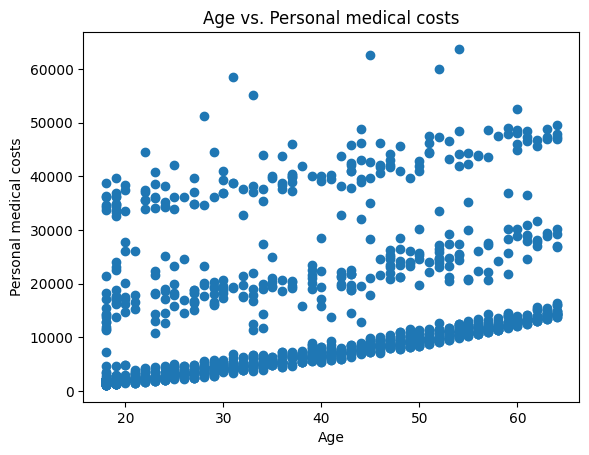

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the Dataset
df = pd.read_csv('/content/insurance.csv')

# Separate categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for linear regression
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model
lin_reg.fit(X_train, y_train)

# Create a pipeline for SVR
svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = lin_reg.predict(X_test)

# Calculate the R-squared, MSE, and MAE for linear regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Print the evaluation results for linear regression
print('Linear Regression Evaluation Results:')
print('R-squared (R2):', r2_lin)
print('Mean Squared Error (MSE):', mse_lin)
print('Mean Absolute Error (MAE):', mae_lin)

# Make predictions on the testing data
y_pred_svr = svr.predict(X_test)

# Calculate the R-squared, MSE, and MAE for SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation results for SVR
print('\nSupport Vector Regression (SVR) Evaluation Results:')
print('R-squared (R2):', r2_svr)
print('Mean Squared Error (MSE):', mse_svr)
print('Mean Absolute Error (MAE):', mae_svr)

# Data Visualization
# Create a scatter plot of age vs. personal medical costs
plt.scatter(df['age'], df['charges'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.title('Age vs. Personal medical costs')

# Show the plot
plt.show()
